In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.stats.api as sms

from bound_funcs import *
from simulations import *

## Iterate on a realistic DGP

In [3]:
def unobs_quadrant_bounds(data, dgp, id_strategy):
    
    A, D, Y = data['A'], data['D'], data['Y']
    
    if id_strategy == 'IV':
        v10_down, v10_up = get_iv_bounds(data, dgp, a=1, true_class=1)
        v00_down, v00_up = get_iv_bounds(data, dgp, a=0, true_class=1)
        
        w10_down, w10_up = get_iv_bounds(data, dgp, a=1, true_class=0)
        w00_down, w00_up = get_iv_bounds(data, dgp, a=0, true_class=0) 
        
    elif id_strategy == 'Manski':
        v10_down, v00_down = 0, 0
        v10_up = ((A==1) & (D==0)).mean()
        v00_up = ((A==0) & (D==0)).mean()
        
        w10_down, w00_down = 0, 0
        w10_up = ((A==1) & (D==0)).mean()
        w00_up = ((A==0) & (D==0)).mean()
        
    elif id_strategy == 'MSM':
        lam = dgp['lambda']
        
        v10_down = (1/lam)*((v11*rho10)/(rho11))
        v10_down = lam*((v11*rho10)/(rho11))

        
        
        
        
    return {
        'v10_down': v10_down,
        'v10_up': v10_up,
        'v00_down': v00_down,
        'v00_up': v00_up,
        'w10_down': w10_down,
        'w10_up': w10_up, 
        'w00_down': w00_down, 
        'w00_up': w00_up
    }
        
        
        
        

NameError: name 'unobs_quadrant_bounds' is not defined

In [2]:
nz = 10
dgp = {
    'N': 10000,
    'nz': nz,
    'beta': 2.5*(1/nz) ,
    'wa': np.array([-1.95, .01, 2, .01]), 
    'wd': np.array([-1.1, 1.7, .01, 1.5, .2, .2]),
    'w_mu1': np.array([1.3, .8, .02, .9, .3, .6]),
    'w_mu0': np.array([1.5, .05, 1.8, .05, .2, .5])
}

u = np.array([[0,-1], [-20, 0]])

metric='TNR'
id_strategies = ['IV', 'Manski']
regret_runs = run_sigmoid_dgp_simulation(dgp, u, metric, id_strategies, n_runs=10)
regret_df = regret_runs.groupby(['tag']).mean().reset_index()

regret_df = regret_df.sort_values(by='tag', ascending=True)
regret_runs = regret_runs.sort_values(by='tag', ascending=True)


NameError: name 'unobs_quadrant_bounds' is not defined

## Main result plot

KeyError: 'OS_down_iv'

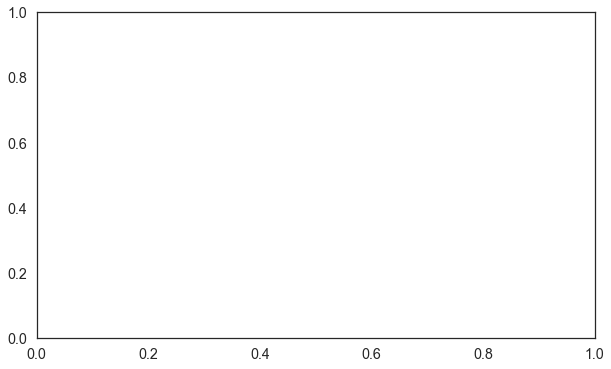

In [62]:
bound_plot(metric, regret_df, regret_runs, save=False)

## Policy value plot

In [3]:
nz = 10
n_runs = 5

dgp = {
    'N': 15000,
    'nz': nz,
    'beta': 2.5*(1/nz) ,
    'wa': np.array([-1.6, .01, 2, .01]), 
    'wd': np.array([-1, 1.7, .01, 1.5, .2, .2]),
    'w_mu1': np.array([.12, .8, .02, .9, .3, .6]),
    'w_mu0': np.array([.33, .05, 1.8, .05, .2, .5])
}

results = []
id_strategies=['Manski']

for fn_cost in range(1,21):
    u = np.array([[0,-fn_cost], [-1, 0]])
    regret_runs = run_sigmoid_dgp_simulation(dgp, u, 'PV_cost', id_strategies, n_runs=n_runs)
    regret_runs['cost_ratio'] = 1/fn_cost
    results.append(regret_runs)

for fp_cost in range(1,21):
    u = np.array([[0,-1], [-fp_cost, 0]])
    regret_runs = run_sigmoid_dgp_simulation(dgp, u, 'PV_cost', id_strategies, n_runs=n_runs)
    regret_runs['cost_ratio'] = fp_cost/1
    results.append(regret_runs)

crdf = pd.concat(results)
crdf = crdf[crdf['tag'] == 'Population']
crdf = crdf.sort_values(by='cost_ratio')
crdf = crdf.groupby('cost_ratio').mean().reset_index()

plt.axhline(0, color='grey', zorder=1, linestyle='--')
plt.fill_between(crdf['cost_ratio'], crdf['TS_down'],crdf['TS_up'], alpha=.5, label='Two step')
plt.fill_between(crdf['cost_ratio'], crdf['OS_down'],crdf['OS_up'], alpha=.5, label='One step')
plt.plot(crdf['cost_ratio'], crdf['R'], color='k', label='Oracle')
plt.xscale('log',base=10) 
plt.legend(loc='lower right')

plt.xlabel('$\delta$', fontsize=18)
plt.ylabel('PV Regret', fontsize=16)
plt.savefig('figs/pv_regret.png', dpi=400, bbox_inches='tight')

NameError: name 'run_sigmoid_dgp_simulation' is not defined

In [73]:
## Policy value plot

metrics = ['FPR', 'TPR', 'TNR', 'FNR', 'ACCURACY']
interval = np.arange(0, 1,.05)[1:]
u = np.array([[0,0], [0, 0]])
N=15000
n_runs = 1
results = []
id_strategies=['Manski']

for pD in interval:
    for pA in interval:
        for pY in interval:

            dgp = {
                'pD': pD,
                'pA': pA,
                'pY': pY,
                'N': N
            }
            
            data, vstats = bernoulli_3d(dgp)
            ASR = ((data['A'] == 0) & (data['D'] == 0)).mean()
            ASD = (data['D'] == 0).mean()
            
            config = {
                'ASR': ASR,
                'ASD': ASD,
                'pD': pD,
                'pA': pA,
                'pY': pY
            }
            
            for metric in metrics:
                for run in range(n_runs):
                    bounds = compare_bounds(data, dgp, 'Population', 1, u, metric, id_strategies, run)
                    results.append({**vstats, **bounds[0], **config})

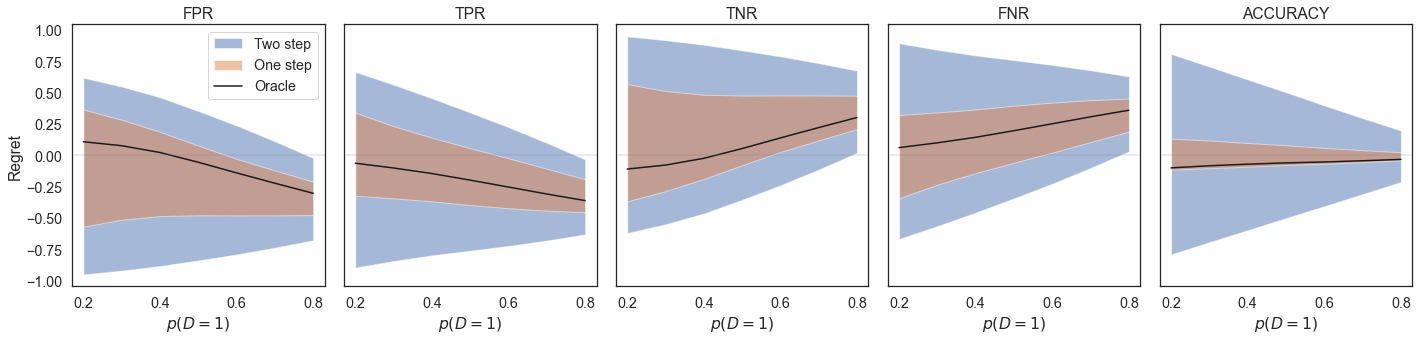

In [74]:
metrics = ['FPR', 'TPR', 'TNR', 'FNR', 'ACCURACY']
crdf = pd.DataFrame(results)
fig, axs = plt.subplots(1, len(metrics), figsize=(20, 5), sharey=True)

for i, metric in enumerate(metrics):
    
    mdf = crdf[crdf['metric'] == metric]
    
    mdf = mdf[(mdf['ASD'] >= .15) & (mdf['ASD'] <= .85)]
    mdf['ASD'] = 1-mdf['ASD']
    mdf = mdf.sort_values(by='ASD', ascending=True)
    
    mdf['ASD_bin'] = mdf['ASD'].round(1)
    mdf = mdf.groupby(['ASD_bin']).mean().reset_index()

    axs[i].fill_between(mdf['ASD_bin'], mdf['TS_down'], mdf['TS_up'], alpha=.5, label='Two step')
    axs[i].fill_between(mdf['ASD_bin'], mdf['OS_down'],mdf['OS_up'], alpha=.5, label='One step')
    axs[i].plot(mdf['ASD_bin'], mdf[f'R'], color='k', label='Oracle')
    axs[i].set_title(metric)
    axs[i].axhline(color='grey', alpha=.2)
    
    axs[i].set_xlabel('$p(D=1)$')
    
    
    
axs[0].set_ylabel('Regret')
axs[0].legend()
plt.tight_layout()
plt.savefig('metric_bound_plots.png', dpi=500, bbox_inches='tight')


## Numeric subgroup example 

In [75]:
dgp = {
    'pD': .19,
    'pA': .29,
    'pY': .1,
    'N': 30000
}

D = np.random.binomial(1, dgp['pD'], size=dgp['N'])
A = np.random.binomial(1, dgp['pA'], size=dgp['N'])
Y = np.random.binomial(1, dgp['pY'], size=dgp['N'])

RMAG =  np.random.binomial(1, .8, size=dgp['N'])
DA_corr =  np.random.binomial(1, .8, size=dgp['N'])
   
    
A[(D == 0) & (DA_corr == 1)] = 0

D[(A == 1) & (D == 0) & (Y == 1) & (RMAG == 1)] = 1 
A[(A == 1) & (D == 0) & (Y == 1) & (RMAG == 1)] = 0



vstats = get_v_stats(D, A, Y)

data = { 
    'D': D, 
    'Y': Y, 
    'A': A,
}

R_TS_down, R_TS_up = two_step_bounds(data, dgp, u, 'ACCURACY', id_strategy='Manski')
R_OS_down, R_OS_up = one_step_bounds(data, dgp, u, 'ACCURACY', id_strategy='Manski')

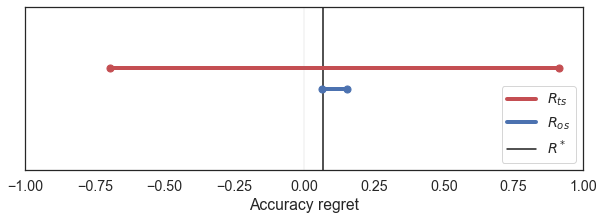

In [76]:

fig, ax = plt.subplots(figsize=(10,3))
R=oracle_regret(data, u, 'ACCURACY')

plt.plot([R_TS_down, R_TS_up], [0.05, 0.05], color='r', linestyle='-', label="$R_{ts}$",  linewidth=4)
plt.scatter(R_TS_down, 0.05,  color='r', s=50)
plt.scatter(R_TS_up, 0.05,  color='r', s=50)

plt.plot([R_OS_down, R_OS_up], [0, 0], color='b', linestyle='-', label="$R_{os}$",  linewidth=4)
plt.scatter(R_OS_down, 0,  color='b', s=50)
plt.scatter(R_OS_up, 0,  color='b', s=50)

plt.axvline(R, color='k', zorder=0, linestyle='-', label="$R^*$")

plt.axvline(color='grey', alpha=.1)
plt.ylim([-.2,.2])
plt.xlim([-1,1])
plt.legend(loc='lower right')
plt.xlabel("Accuracy regret")
plt.ylabel("")
ax.set(yticklabels=[]) 

plt.savefig('examples.pdf', dpi=600)

## MSM bounds

In [ ]:
nz = 10
n_runs = 5

dgp = {
    'N': 15000,
    'nz': nz,
    'beta': 2.5*(1/nz) ,
    'wa': np.array([-1.6, .01, 2, .01]), 
    'wd': np.array([-1, 1.7, .01, 1.5, .2, .2]),
    'w_mu1': np.array([.12, .8, .02, .9, .3, .6]),
    'w_mu0': np.array([.33, .05, 1.8, .05, .2, .5])
}

results = []
id_strategies=['Manski']

for fn_cost in range(1,21):
    u = np.array([[0,-fn_cost], [-1, 0]])
    regret_runs = run_sigmoid_dgp_simulation(dgp, u, 'PV_cost', id_strategies, n_runs=n_runs)
    regret_runs['cost_ratio'] = 1/fn_cost
    results.append(regret_runs)

for fp_cost in range(1,21):
    u = np.array([[0,-1], [-fp_cost, 0]])
    regret_runs = run_sigmoid_dgp_simulation(dgp, u, 'PV_cost', id_strategies, n_runs=n_runs)
    regret_runs['cost_ratio'] = fp_cost/1
    results.append(regret_runs)

crdf = pd.concat(results)
crdf = crdf[crdf['tag'] == 'Population']
crdf = crdf.sort_values(by='cost_ratio')
crdf = crdf.groupby('cost_ratio').mean().reset_index()

plt.axhline(0, color='grey', zorder=1, linestyle='--')
plt.fill_between(crdf['cost_ratio'], crdf['TS_down'],crdf['TS_up'], alpha=.5, label='Two step')
plt.fill_between(crdf['cost_ratio'], crdf['OS_down'],crdf['OS_up'], alpha=.5, label='One step')
plt.plot(crdf['cost_ratio'], crdf['R'], color='k', label='Oracle')
plt.xscale('log',base=10) 
plt.legend(loc='lower right')

plt.xlabel('$\delta$', fontsize=18)
plt.ylabel('PV Regret', fontsize=16)
plt.savefig('figs/pv_regret.png', dpi=400, bbox_inches='tight')

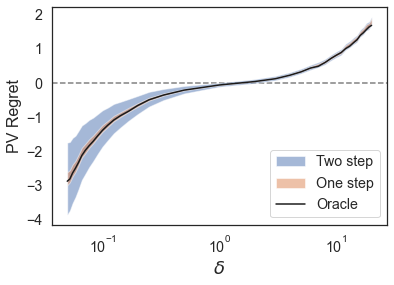

In [86]:
nz = 10
n_runs = 5

dgp = {
    'N': 15000,
    'nz': nz,
    'beta': 2.5*(1/nz) ,
    'wa': np.array([-1.6, .01, 2, .01]), 
    'wd': np.array([-1, 1.7, .01, 1.5, .2, .2]),
    'w_mu1': np.array([.12, .8, .02, .9, .3, .6]),
    'w_mu0': np.array([.33, .05, 1.8, .05, .2, .5]),
    'lambda': 1.1
}

results = []
id_strategies=['MSM']

for fn_cost in range(1,21):
    u = np.array([[0,-fn_cost], [-1, 0]])
    regret_runs = run_sigmoid_dgp_simulation(dgp, u, 'PV_cost', id_strategies, n_runs=n_runs)
    regret_runs['cost_ratio'] = 1/fn_cost
    results.append(regret_runs)

for fp_cost in range(1,21):
    u = np.array([[0,-1], [-fp_cost, 0]])
    regret_runs = run_sigmoid_dgp_simulation(dgp, u, 'PV_cost', id_strategies, n_runs=n_runs)
    regret_runs['cost_ratio'] = fp_cost/1
    results.append(regret_runs)

crdf = pd.concat(results)
crdf = crdf[crdf['tag'] == 'Population']
crdf = crdf.sort_values(by='cost_ratio')
crdf = crdf.groupby('cost_ratio').mean().reset_index()

plt.axhline(0, color='grey', zorder=1, linestyle='--')
plt.fill_between(crdf['cost_ratio'], crdf['TS_down'],crdf['TS_up'], alpha=.5, label='Two step')
plt.fill_between(crdf['cost_ratio'], crdf['OS_down'],crdf['OS_up'], alpha=.5, label='One step')
plt.plot(crdf['cost_ratio'], crdf['R'], color='k', label='Oracle')
plt.xscale('log',base=10) 
plt.legend(loc='lower right')

plt.xlabel('$\delta$', fontsize=18)
plt.ylabel('PV Regret', fontsize=16)
plt.savefig('figs/pv_regret.png', dpi=400, bbox_inches='tight')

In [43]:
R_down = w01 + v10_down - w10_up - v01
R_up = w01 + v10_up - w10_down - v01

In [45]:
TS_down

-0.6953999999999999

In [44]:
R_down

0.06683333333333333

In [40]:
v10_up

0.04276666666666667